# Ionospheric Connection Explorer (ICON) 
---------------
## Introduction of the science products 

The Ionospheric Connection Explorer, or ICON, is a new NASA Explorer mission
that will explore the boundary between Earth and space to understand the
physical connection between our world and our space environment. 
<br>
- L2.2 MIGHTI--Neutral Vector Winds -- Zonal Wind & Meridional Wind (python based)
- L2.3 MIGHTI--Neutral Temperature (IDL based)
- L2.4 FUV--Colum O/$N_{2}$ (IDL based)
- L2.5 FUV--Nighttime $O^{+}$ Density (IDL based)
- L2.6 EUV--Daytime $O^{+}$ Density (IDL based)
- L2.7 IVM--Ion Drift/Ion Densities/Ion Temperature (python based)

## Note:
- Use flag
- Orbit number is not an integer in L2.2

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
from datetime import datetime, timedelta
import bisect
import netCDF4

import pandas as pd
import seaborn as sns

import cartopy.crs as ccrs
import cartopy

plt.style.use('seaborn')

# 1. Plot a single orbit--use L2.3 Temperature as an example

In [9]:
# L23_dir='/disks/data/icon/Repository/Archive/LEVEL.2/MIGHTI-A/%s/%s/Temperature/' % (target_YYYY,target_doy)
# L23_fname='%sICON_L2-3_MIGHTI-A_Temperature_%s-%s-%s_%s.NC' % (L23_dir,target_YYYY,target_mm,target_dd,ICON_L23_ver_code)
MTAB='A'
fn_L23 = '/disks/data/icon/Repository/Archive/LEVEL.2/MIGHTI-A/2020/006/Temperature/ICON_L2-3_MIGHTI-%s_Temperature_2020-01-06_v02r000.NC' % (MTAB)

#### Load ion velocity
di = {}
with netCDF4.Dataset(fn_L23) as d:
    time_msec   = np.ma.filled(d.variables['Epoch'][...], np.nan) # Time in msec since 1970-01-01
    di['time']  = np.array([datetime(1970,1,1) + timedelta(seconds = 1e-3*s) for s in time_msec])
    di['TN']  = np.ma.filled(d.variables['ICON_L23_MIGHTI_%s_Temperature' % (MTAB)][...], np.nan) # Mag Meridional (Upward/poleward) ion velocity
    di['mlat']  = np.ma.filled(d.variables['ICON_L23_MIGHTI_%s_Tangent_Magnetic_Longitude' % (MTAB)][...], np.nan) # Magnetic latitude
    di['slt']   = np.ma.filled(d.variables['ICON_L23_MIGHTI_%s_Tangent_Solar_Local_Time' % (MTAB)][...], np.nan) # Local solar time
    di['alt']   = np.ma.filled(d.variables['ICON_L23_MIGHTI_%s_Tangent_Altitude' % (MTAB)][...], np.nan) # Local solar time

    # Simple quality control
#     curr0  = np.ma.filled(d.variables['ICON_L27_low_log_level_currents_0'][...], np.nan) # Quality control variable
#     curr1  = np.ma.filled(d.variables['ICON_L27_low_log_level_currents_1'][...], np.nan) # Quality control variable
#     photoy = np.ma.filled(d.variables['ICON_L27_photo_flag_y'][...], np.nan) # Quality control variable
#     photoz = np.ma.filled(d.variables['ICON_L27_photo_flag_z'][...], np.nan) # Quality control variable
#     good_data = (curr0 == 0) & (curr1 == 0) & (photoy == 0) & (photoz == 0) # This requires high current and negligible photoemission
#     di['mlat'][~good_data] = np.nan
    


In [ ]:
# VER plot
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



SLT_array=np.nanmean(ICON_L23_Solar_Local_Time,axis=0)
mean_lon_array=np.nanmean(ICON_L23_Longitude,axis=1)
mean_lat_array=np.nanmean(ICON_L23_Latitude,axis=1)
orbit_LST_array=get_orbit_LST_num(SLT_array)
# G_SLT_array=np.nanmean(G_ICON_L22_Solar_Local_Time,axis=0)
# G_orbit_LST_array=get_orbit_LST_num(G_SLT_array)

orbit_LST_num=np.int(5)
orbit_num_idx=np.argwhere(orbit_LST_array==orbit_LST_num)

sub_SLT_array=SLT_array[orbit_num_idx[:,0]]
sub_lon_array=mean_lon_array[orbit_num_idx[:,0]]
sub_lat_array=mean_lat_array[orbit_num_idx[:,0]]

close_noon=np.argmin(np.abs(sub_SLT_array-12.))
noon_lon=sub_lon_array[close_noon]
noon_lat=sub_lat_array[close_noon]

right_lon=noon_lon+180
if (right_lon > 180):
    right_lon=right_lon-360

left_lon=360
if (left_lon > 180):
    left_lon=left_lon-360


orbit_SLT_array=sub_SLT_array
orbit_alt_array=ICON_L22_Altitude
orbit_lon_array=sub_lon_array
orbit_lat_array=sub_lat_array

NC_fname_split=re.split('/|.NC',L22_fname)
plot_fname=NC_fname_split[-2]

target_1_array=ICON_L22_Relative_VER[:,orbit_num_idx[:,0]]
cmap_1='plasma'
vmax_1=0
vmin_1=150
orbit_LST_num=orbit_LST_num
variable_name_1='VER'
xlabel_1='Solar Local Time (hr)'
ylabel_1='Altitude (km)'
cb_label_1='VER (ph/$cm^3$/s)'

target_2_array=VER_Alt_Differential_array[:,orbit_num_idx[:,0]]
cmap_2='coolwarm'
vmax_2=10
vmin_2=-10
variable_name_2='VER vertical derivative'
xlabel_2='Solar Local Time (hr)'
ylabel_2='Altitude (km)'
cb_label_2='delta VER (ph/$cm^3$/s)'


if (vmax_1 == None):
    vmax_1=np.nanmax(target_1_array)
if (vmin_1 == None):
    vmin_1=np.nanmin(target_1_array)
if (vmax_2 == None):
    vmax_2=np.nanmax(target_2_array)
if (vmin_2 == None):
    vmin_2=np.nanmin(target_2_array)

import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})
X, Y = np.meshgrid(orbit_SLT_array,orbit_alt_array)
fig,ax=plt.subplots(figsize=(8,8))#fig=pp.figure(figsize=(12,10)

fig.suptitle(plot_fname,size=15)
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,1]) 


ax0=plt.subplot(gs[0,0])
#im = ax0.pcolor(X,Y, MA_daily_dev_array,cmap='plasma',norm=colors.Normalize(vmin=0, vmax=150))
im = ax0.pcolor(X,Y,target_1_array ,cmap=cmap_1,vmin=vmin_1,vmax=vmax_1)#,norm=colors.Normalize(vmin=0, vmax=150))
ax0.axis([0,24, Y.min(), Y.max()])

ax0.set_title('%s Orbit#%02i' % (variable_name_1,orbit_LST_num),size=15)
ax0.set_xlabel(xlabel_1)
ax0.set_ylabel(ylabel_1)
ax0.set_xlim((0,24))

#     if contour_1:


color_bar=fig.colorbar(im)
color_bar.set_label(cb_label_1)



ax0=plt.subplot(gs[1,0])
#im = ax0.pcolor(X,Y, MA_daily_dev_array,cmap='plasma',norm=colors.Normalize(vmin=0, vmax=150))
im = ax0.pcolor(X,Y,target_2_array ,cmap=cmap_2,vmin=vmin_2,vmax=vmax_2)#,norm=colors.Normalize(vmin=0, vmax=150))
ax0.axis([0,24, Y.min(), Y.max()])

ax0.set_title('%s Orbit#%02i' % (variable_name_2,orbit_LST_num),size=15)
ax0.set_xlabel(xlabel_2)
ax0.set_ylabel(ylabel_2)
ax0.set_xlim((0,24))
color_bar=fig.colorbar(im)
color_bar.set_label(cb_label_2)

plt.tight_layout(rect=[0, 0.0, 1., 0.99])


gs_map = gridspec.GridSpec(1, 1)
ax_list = [fig.add_subplot(ss,projection=ccrs.PlateCarree(),extent=[-180,180,-50,70]) for ss in gs_map]

ax_list[0].coastlines(color='black', linewidth=1)
#ax.gridlines()

gl = ax_list[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)#,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
gs_map.tight_layout(fig,rect=[0.01, 0.0, 1.07, 0.32],h_pad=0.5)
noon_idx=np.argmin(np.abs(orbit_SLT_array-12))
im=ax_list[0].scatter(orbit_lon_array,orbit_lat_array,c=orbit_SLT_array,cmap='twilight_shifted')
if (orbit_lon_array[noon_idx] > 180):
    noon_lon=orbit_lon_array[noon_idx]-360.
else:
    noon_lon=orbit_lon_array[noon_idx]
ax_list[0].plot(noon_lon,orbit_lat_array[noon_idx],'ko')
color_bar=fig.colorbar(im)
color_bar.set_label('Solar Local Time (hr)')
# ax0.axis([X.min(), X.max(), Y.min(), Y.max()])

# ax0.set_title('VER Vertical derivative Orbit#%02i' % (orbit_LST_num),size=15)
# ax0.set_xlabel('Solar Local Time (hr)')
# ax0.set_ylabel('Altitude (km)')
# color_bar=fig.colorbar(im)
# color_bar.set_label('$delta$ VER (ph/$cm^3$/s)')

plt.tight_layout(rect=[0, 0.0, 1.05, 0.98])



# 2. IVM-MIGHTI 
- Neutral wind driven electrodynamic interactions

In [8]:
fn_mti = '/disks/data/icon/Repository/Archive/LEVEL.2/MIGHTI/2020/066/Vector-Winds/ICON_L2-2_MIGHTI_Vector-Wind-Green_2020-03-06_v02r000.NC'
fn_ivm = '/disks/data/icon/Repository/Archive/LEVEL.2/IVM-A/2020/066/Data/ICON_L2-7_IVM-A_2020-03-06_v02r001.NC'

#### Load ion velocity
di = {}
with netCDF4.Dataset(fn_ivm) as d:
    time_msec   = np.ma.filled(d.variables['Epoch'][...], np.nan) # Time in msec since 1970-01-01
    di['time']  = np.array([datetime(1970,1,1) + timedelta(seconds = 1e-3*s) for s in time_msec])
    di['vmer']  = np.ma.filled(d.variables['ICON_L27_Ion_Velocity_Meridional'][...], np.nan) # Mag Meridional (Upward/poleward) ion velocity
    di['mlat']  = np.ma.filled(d.variables['ICON_L27_Magnetic_Latitude'][...], np.nan) # Magnetic latitude
    di['slt']   = np.ma.filled(d.variables['ICON_L27_Solar_Local_Time'][...], np.nan) # Local solar time
    di['alt']   = np.ma.filled(d.variables['ICON_L27_Altitude'][...], np.nan) # Local solar time

    # Simple quality control
    curr0  = np.ma.filled(d.variables['ICON_L27_low_log_level_currents_0'][...], np.nan) # Quality control variable
    curr1  = np.ma.filled(d.variables['ICON_L27_low_log_level_currents_1'][...], np.nan) # Quality control variable
    photoy = np.ma.filled(d.variables['ICON_L27_photo_flag_y'][...], np.nan) # Quality control variable
    photoz = np.ma.filled(d.variables['ICON_L27_photo_flag_z'][...], np.nan) # Quality control variable
    good_data = (curr0 == 0) & (curr1 == 0) & (photoy == 0) & (photoz == 0) # This requires high current and negligible photoemission
    di['mlat'][~good_data] = np.nan
    
#### Load winds
dm = {}
with netCDF4.Dataset(fn_mti) as d:
    time_msec  = np.ma.filled(d.variables['Epoch'][...], np.nan) # Time in msec since 1970-01-01
    dm['time'] = np.array([datetime(1970,1,1) + timedelta(seconds = 1e-3*s) for s in time_msec])
    dm['uzon'] = np.ma.filled(d.variables['ICON_L22_Zonal_Wind'][...], np.nan)
    dm['umer'] = np.ma.filled(d.variables['ICON_L22_Meridional_Wind'][...], np.nan)
    dm['alt']  = np.ma.filled(d.variables['ICON_L22_Altitude'][...], np.nan)
    
    # Simple quality control
    wind_quality = np.ma.filled(d.variables['ICON_L22_Wind_Quality'][...], np.nan)
    good_data = wind_quality == 1
    dm['uzon'][~good_data] = np.nan
    dm['umer'][~good_data] = np.nan

In [9]:
#### Find first equator crossing during daytime 
icon_near_equator = (abs(di['mlat']) < 1.) # ICON is within 1 degree of equator
daytime = abs(di['slt'] - 12) < 6 # ICON is in daytime hours
ii = np.where( icon_near_equator & daytime )[0][0] # index of first IVM sample
t0 = di['time'][ii]
print('ICON near equator starting at %s' % t0)

# Find MIGHTI index that matches this time
# Note: in practice, the true MIGHTI-IVM conjunction may happen a couple minutes before or after this time.
# Magnetic field line tracing is recommended to find true conjunctions.
im = np.argmin(abs(dm['time'] - t0))

ICON near equator starting at 2020-03-06 01:27:28.224000


/home/yjwu/miniconda3/envs/my_conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


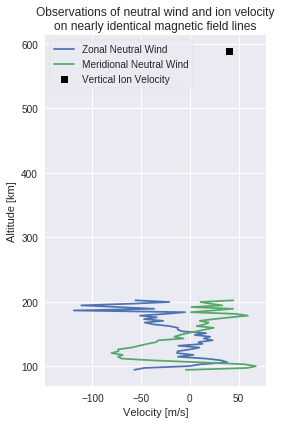

In [11]:
#### Plot the profiles ###
plt.figure(figsize=(4,6))

plt.plot(dm['uzon'][im,:], dm['alt'], 'C0-', label='Zonal Neutral Wind')
plt.plot(dm['umer'][im,:], dm['alt'], 'C1-', label='Meridional Neutral Wind')
plt.plot(di['vmer'][ii], di['alt'][ii], 'ks', label='Vertical Ion Velocity')
plt.ylabel('Altitude [km]')
plt.xlabel('Velocity [m/s]')
plt.title('Observations of neutral wind and ion velocity\non nearly identical magnetic field lines')
plt.legend(frameon=True)
plt.tight_layout()